<a href="https://colab.research.google.com/github/pandeyp819/CreditCard_FraudDetect/blob/main/Fraud%20Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model,svm
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve,precision_score,recall_score,f1_score,fbeta_score,accuracy_score

In [2]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['font.size']=12
plt.rcParams['axes.titlesize']=18
plt.rcParams['axes.labelsize']=12
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10
plt.rcParams['legend.fontsize']=10

In [4]:
df = pd.read_csv('/content/data/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.loc[:,['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


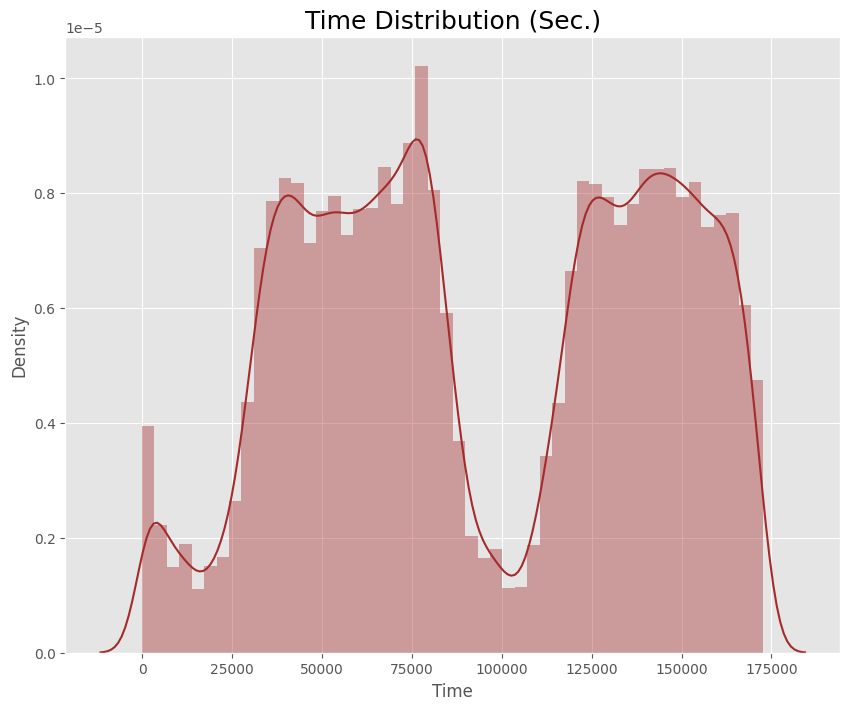

In [7]:
plt.figure(figsize=(10,8),)
plt.title('Time Distribution (Sec.)')
sns.distplot(df['Time'],color='brown')

plt.savefig('timedif.png')

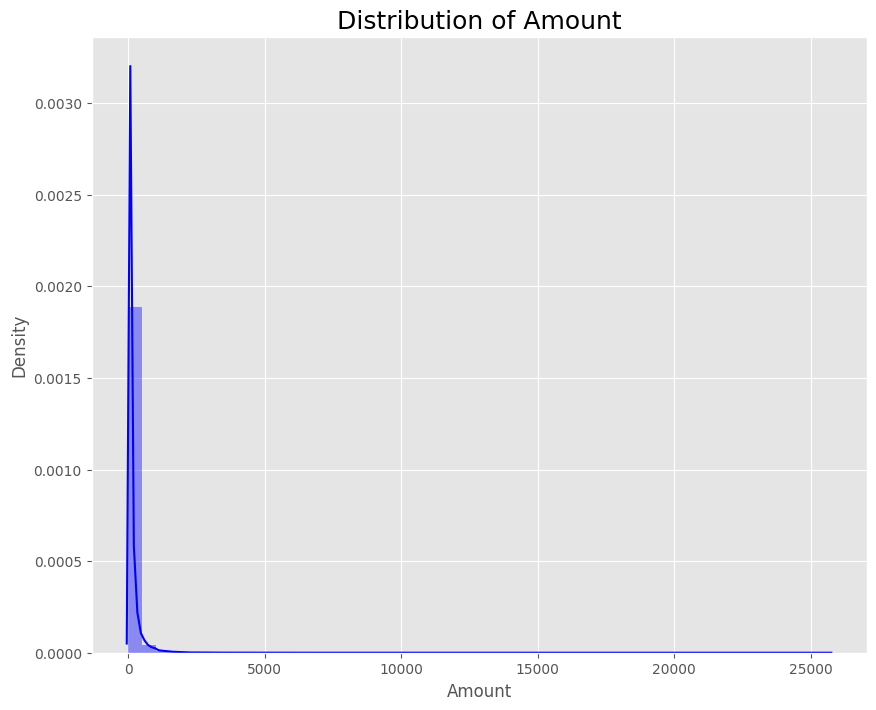

In [8]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
sns.distplot(df['Amount'],color='blue')

plt.savefig('amount_dist.png')

In [9]:
fraud = df['Class'].value_counts()[1]
n_fraud = df['Class'].value_counts()[0]

print(f'Frauds:          {fraud}       | Non-Frauds: {n_fraud}')
print(f'Ratio of Frauds: {fraud}/{n_fraud}| Percentage: {fraud/n_fraud*100: .3f}%')

Frauds:          492       | Non-Frauds: 284315
Ratio of Frauds: 492/284315| Percentage:  0.173%


# Data Processing

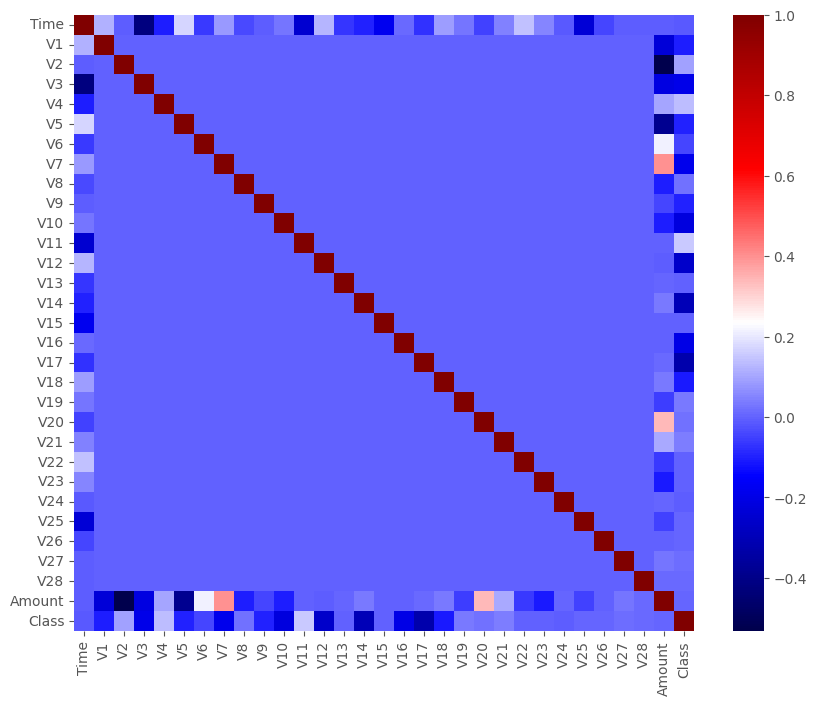

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(data = df.corr(), cmap="seismic", annot=False)

plt.savefig('heatmap_corr')

In [11]:
data = df.drop(columns=['Class'])
ans = df['Class']

In [12]:
x_trainval,x_test,y_trainval,y_test = train_test_split(data,ans,test_size=0.2,stratify=df['Class'],random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_trainval,y_trainval,test_size=0.25,stratify=y_trainval,random_state=42)

In [13]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_std = scaler.transform(x_train)
x_val_std = scaler.transform(x_val)
x_test_std = scaler.transform(x_test)

rus = RandomUnderSampler(random_state=42)

x_train_under,y_train_under = rus.fit_resample(x_train_std,y_train)
x_val_under,y_val_under = rus.fit_resample(x_val_std,y_val)

# **"Logistic Regression"**

In [14]:
penalty = ['l2']
C = np.logspace(0,4,10,100,1000)
param_grid = dict(C = C,penalty = penalty)

logistic = linear_model.LogisticRegression(solver='lbfgs',max_iter=10000)
logistic_grid = GridSearchCV(logistic,param_grid,cv=5,scoring='roc_auc',verbose=10,n_jobs=-1)
logistic_grid.fit(x_train_under,y_train_under)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.15443469e+01, 4.64158883e+02, 1.00000000e+04,
       2.15443469e+05, 4.64158883e+06, 1.00000000e+08, 2.15443469e+09,
       4.64158883e+10, 1.00000000e+12]),
                         'penalty': ['l2']},
             scoring='roc_auc', verbose=10)

In [15]:
gnb = GaussianNB()
gnb_best = gnb.fit(x_train_under,y_train_under)

In [16]:
param_grid = {
    'max_depth': [5,10,15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10,20],
    'min_samples_split': [2,5],
    'n_estimators': [500,700]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf,param_grid,cv=5,scoring='roc_auc',verbose=10,n_jobs=-1)
rf_grid.fit(x_train_under,y_train_under)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': ['sqrt'],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [500, 700]},
             scoring='roc_auc', verbose=10)

In [17]:
dummy = DummyClassifier()
dummy.fit(x_train_under,y_train_under)

DummyClassifier()

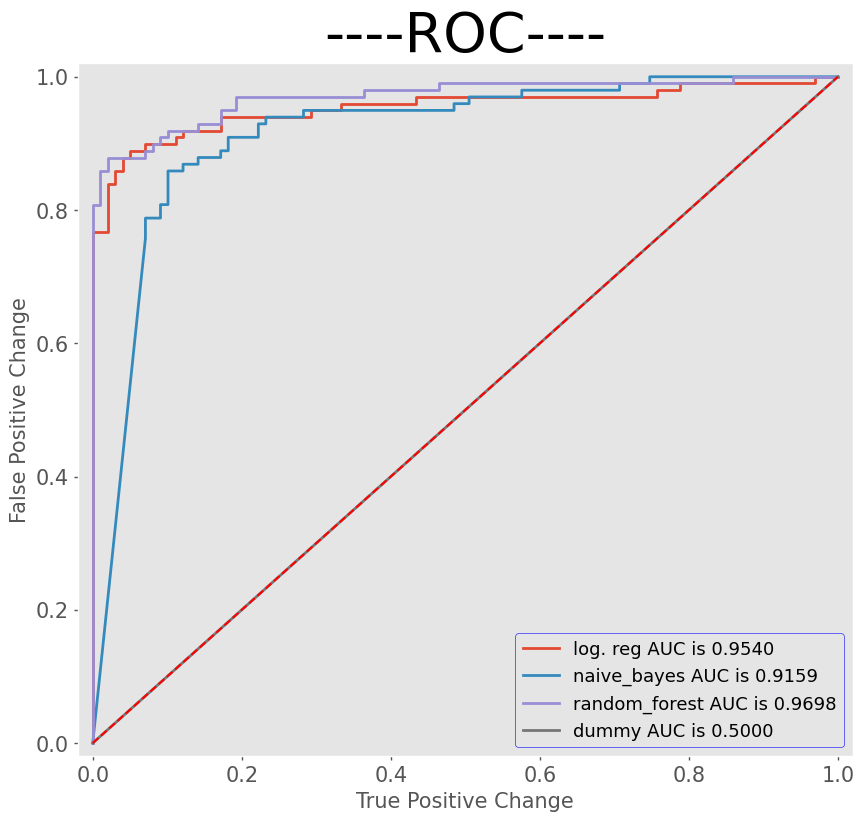

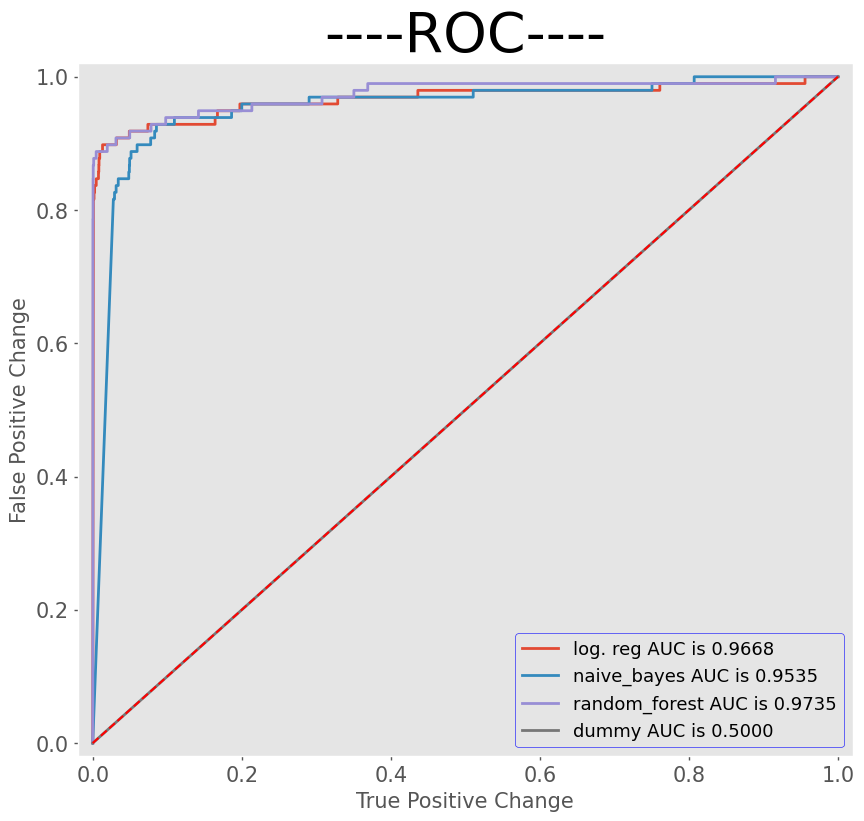

In [18]:
def plot_curv(x,y,models,model_names,figsize=(10,9)):
  fig , ax= plt.subplots(figsize=figsize)
  for i,model in enumerate(models):
    y_pred = list(model.predict_proba(x)[:,1])
    fpr,tpr,threshold = metrics.roc_curve(y,y_pred)
    roc_auc = metrics.auc(fpr,tpr)
    plt.plot(fpr,tpr,label=(model_names[i]+' AUC is %0.4f' %
                            roc_auc),linewidth=2.0)
  ax.grid(False)
  ax.tick_params(length=3, width=1, labelsize=15,grid_color= 'r', grid_alpha= 0.5)
  leg = plt.legend(loc='lower right', prop={'size':13})
  leg.get_frame().set_edgecolor('b')
  plt.title('----ROC----',fontsize=40)
  plt.plot([0,1],[0,1],'r--')
  plt.xlim([-.02,1.02])
  plt.ylim([-.02,1.02])
  plt.xlabel('True Positive Change',fontsize=15)
  plt.ylabel('False Positive Change',fontsize=15)

models = [logistic_grid.best_estimator_,gnb_best,rf_grid.best_estimator_,dummy]
model_names = ['log. reg','naive_bayes','random_forest','dummy']
plot_curv(x_val_under,y_val_under,models,model_names)
plt.savefig('roc in sample.png')

plot_curv(x_test_std,y_test,models,model_names)
plt.savefig('roc out sample.png')